# ALS project

### EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_profiling import ProfileReport
import webbrowser, os

In [2]:
def feature_report(df):
    '''
    print a report of every feature
    '''
    profile = pandas_profiling.ProfileReport(df, bins=30)
    profile.to_file(outputfile="output.html")
    webbrowser.open('file://' + os.path.realpath("output.html"))
    #end function

## treatment arms

In [3]:
txt = pd.read_csv("data/Treatment.csv")

In [4]:
txt.head()

,subject_id,Study_Arm,Treatment_Group_Delta
0,89,Active,NaN
1,329,Active,0.0
2,348,Placebo,0.0
3,406,Active,NaN
4,411,Active,NaN


In [5]:
# look for duplicted subjects in the dataset
print(len(txt))  # 9640
print(len(set(txt['subject_id'])))  #9640 = all unique subjects

9640
9640


In [6]:
#feature_report(txt)
# placebo = 30.2% of subjects
# active = 69.8% of subjects

In [7]:
# id's of placebo subjects
placebo = txt.loc[txt['Study_Arm']=='Placebo']
print(len(placebo))
placebo.head()

2912


,subject_id,Study_Arm,Treatment_Group_Delta
2,348,Placebo,0.0
7,902,Placebo,0.0
9,1064,Placebo,0.0
11,1312,Placebo,0.0
16,2132,Placebo,NaN


## questionaire

In [8]:
question = pd.read_csv("data/alsfrs.csv", )

In [9]:
#feature_report(question)

see the feature report

In [10]:
# rename _delta to study day
question['study_day'] = question['ALSFRS_Delta']

In [11]:
# remove 'Mode_of_Administration', 'ALSFRS_Responded_By' column - empty
question.drop(['Mode_of_Administration','ALSFRS_Responded_By', 'ALSFRS_Delta'] , axis=1, inplace=True)



In [12]:
question.head()

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day
0,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,2.0,2.0,1.0,3.0,27.0,NaN,NaN,NaN,NaN,0.0
1,329,4.0,3.0,4.0,3.0,1.5,NaN,3.0,2.0,2.0,1.0,3.0,26.5,NaN,NaN,NaN,NaN,8.0
2,329,4.0,3.0,4.0,3.0,1.0,NaN,3.0,2.0,2.0,1.0,3.0,26.0,NaN,NaN,NaN,NaN,16.0
3,329,4.0,3.0,4.0,3.0,3.0,NaN,3.0,3.0,2.0,1.0,4.0,30.0,NaN,NaN,NaN,NaN,42.0
4,329,4.0,3.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,2.0,3.0,30.0,NaN,NaN,NaN,NaN,72.0


In [13]:
# number questionaires per subject
grp_sub_question = question.groupby('subject_id')
n_qs = grp_sub_question['subject_id'].count()
print(n_qs.head())

subject_id
329    12
348    15
533     6
586     1
649    12
Name: subject_id, dtype: int64


In [14]:
# subjects with at least one questionaire
p = placebo.drop('Treatment_Group_Delta', axis=1)
p_qs = question.merge(p, how='inner', on='subject_id')

In [15]:
p_qs.head()

,subject_id,Q1_Speech,Q2_Salivation,Q3_Swallowing,Q4_Handwriting,Q5a_Cutting_without_Gastrostomy,Q5b_Cutting_with_Gastrostomy,Q6_Dressing_and_Hygiene,Q7_Turning_in_Bed,Q8_Walking,Q9_Climbing_Stairs,Q10_Respiratory,ALSFRS_Total,ALSFRS_R_Total,R_1_Dyspnea,R_2_Orthopnea,R_3_Respiratory_Insufficiency,study_day,Study_Arm
0,348,4.0,4.0,4.0,3.0,2.0,NaN,3.0,4.0,2.0,1.0,NaN,NaN,39.0,4.0,4.0,4.0,0.0,Placebo
1,348,4.0,4.0,4.0,3.0,2.0,NaN,2.0,4.0,2.0,1.0,NaN,NaN,38.0,4.0,4.0,4.0,4.0,Placebo
2,348,4.0,4.0,4.0,4.0,2.0,NaN,2.0,3.0,2.0,1.0,NaN,NaN,38.0,4.0,4.0,4.0,52.0,Placebo
3,348,4.0,4.0,4.0,4.0,2.0,NaN,2.0,3.0,2.0,1.0,NaN,NaN,38.0,4.0,4.0,4.0,61.0,Placebo
4,348,4.0,4.0,4.0,4.0,2.0,NaN,2.0,3.0,2.0,1.0,NaN,NaN,38.0,4.0,4.0,4.0,99.0,Placebo


In [16]:
# number questionaires per placebo subject
grp_p_qs = p_qs.groupby('subject_id')
n_p_qs = grp_p_qs['subject_id'].count()


subject_id
348     15
902      7
1064    16
1312     1
2540     4
Name: subject_id, dtype: int64


In [21]:
n_p_qs.head()

subject_id
348     15
902      7
1064    16
1312     1
2540     4
Name: subject_id, dtype: int64

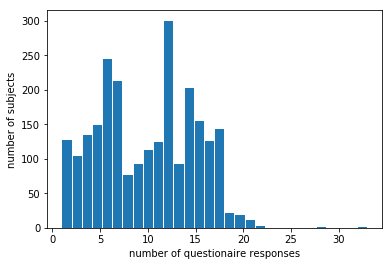

In [25]:
# how many visits per subject?
plt.hist(n_p_qs, rwidth=0.9, bins=30)
plt.xlabel("number of questionaire responses")
plt.ylabel("number of subjects")
plt.show()

In [ ]:
# temporally
